

# >  **Sentiment Analysis on Text**



*Module 1: Prior to Translation and Lemmatization*

**Step 1: Import All Required Packages**

In [0]:
#Importing required packages

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Step 2: Input the dataset and Explore it**

In [0]:
data = pd.read_csv('/content/text_merge.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Speech,sentimentAnnotation
0,0,yo habia visto resenas que decian que picaba c...,-1.0
1,1,y la verdad es que si la use una vez y t- y te...,-1.0
2,2,y dije no: puede ser posible tanto la deseaba ...,-1.0
3,3,esta tambien tira un poquito de pelo pero haga...,-1.0
4,4,pero igual con las lavadas se ha dejado de tir...,1.0


Checking the Language of Speech

In [0]:
pip install langdetect

     |████████████████████████████████| 983kB 4.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=71a76e735e2972376c3ef8bde2e45d31020692424c2c98e23f65fbc212ceaa1a
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [0]:
import langdetect
from langdetect import detect_langs
print(detect_langs(df.Speech[0]))

[es:0.9999966044419895]


**Step 3: Preprocessing Text**
- Remove any HTML Tags
- Remove all non-alphabetic characters
- Change all words to lowercase
- Remove stopwords

In [0]:
#import stopwords
from nltk.corpus import stopwords
my_stop_words=list(stopwords.words('spanish'))

In [0]:
from bs4 import BeautifulSoup
import re
def preprocess_text(text):
    #remove html tags
    tags_rem = BeautifulSoup(text, "lxml").get_text()
    #remove non alphabet characters
    letters_only = re.sub("[^a-zA-Z]", " ", tags_rem)
    #make all words lower
    words = letters_only.lower().split()
    #fetch stop words list
    stop_word = set(stopwords.words("spanish"))
    #get list with stop words removed
    final = [w for w in words if not w in stop_word]
    return( " ".join( final))


df['Speech'] = df['Speech'].apply(lambda x: preprocess_text(x))

In [0]:
df.head()

,Unnamed: 0,Speech,sentimentAnnotation
0,0,habia visto resenas decian picaba usabas,-1.0
1,1,verdad si use vez t arde asi usas arde ojo,-1.0
2,2,dije puede ser posible deseaba arde voy poder ...,-1.0
3,3,tambien tira poquito pelo hagan cuenta quebra ...,-1.0
4,4,igual lavadas dejado tirar,1.0


**Step 4: Creating a Count Vectorizer**

In [0]:
#importing required packages
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize

#Create Vectorizer and remove stopwords
vect=CountVectorizer(stop_words=my_stop_words)
vect.fit(df.Speech)
X_speech=vect.transform(df.Speech)

X_df = pd.DataFrame(X_speech.toarray(), columns=vect.get_feature_names())
X_df['sentimentAnnotation']=df.sentimentAnnotation

#Dataframe after removing stopwords
print(X_df.head()) 

   abajo  abbey  abierta  abri  ...  zombie  zombies  zonas  sentimentAnnotation
0      0      0        0     0  ...       0        0      0                 -1.0
1      0      0        0     0  ...       0        0      0                 -1.0
2      0      0        0     0  ...       0        0      0                 -1.0
3      0      0        0     0  ...       0        0      0                 -1.0
4      0      0        0     0  ...       0        0      0                  1.0

[5 rows x 1411 columns]


**Step 5: Creating different classification models and evaluating their accuracy**

ROC-AUC Plotting Function

In [0]:
def plot_roc_auc(model,X_test,y_test,label):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=label)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()# show the plot
    plt.show()

Logistic Regression (Count Vectorizer)

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = X_df.sentimentAnnotation
X = X_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
#print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on train set:  0.9833333333333333
Accuracy on test set:  0.7222222222222222
Accuracy score test set:  0.7222222222222222


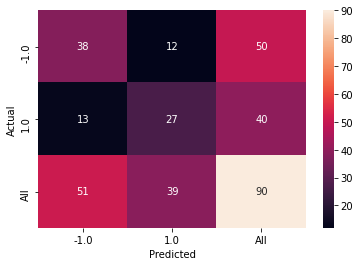

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.847


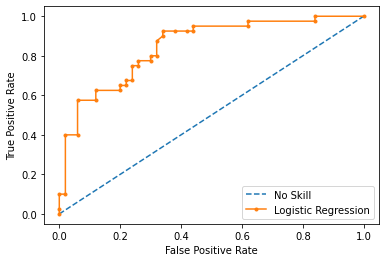

In [0]:
plot_roc_auc(log_reg,X_test,y_test,'Logistic Regression')

Decision Tree (Count Vectorizer)

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0)

# Define the vector of targets and matrix of features
y = X_df.sentimentAnnotation
X = X_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7888888888888889
Confusion matrix test set: 
 [[0.47777778 0.07777778]
 [0.13333333 0.31111111]]


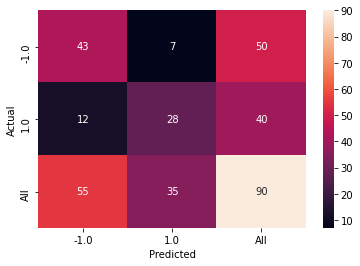

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.780


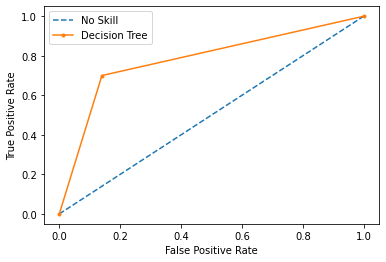

In [0]:
plot_roc_auc(clf,X_test,y_test,'Decision Tree')

XGBoost (Count Vectorizer)

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix

# Define the vector of targets and matrix of features
y = X_df.sentimentAnnotation
X = X_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGB Classifier
xg_model = XGBClassifier()

#Train XGB Model
xg_model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = xg_model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: %f" % (rmse))



Accuracy score test set:  0.7111111111111111
Confusion matrix test set: 
 [[0.48888889 0.06666667]
 [0.22222222 0.22222222]]
RMSE: 1.074968


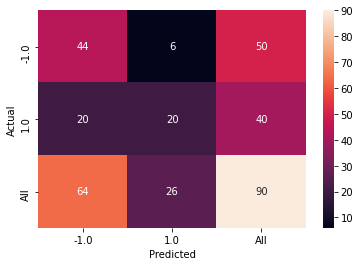

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.798


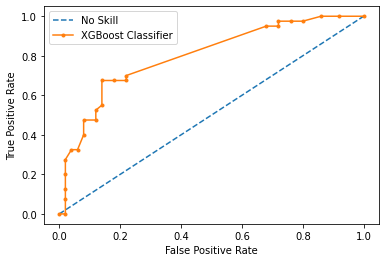

In [0]:
plot_roc_auc(xg_model,X_test,y_test,'XGBoost Classifier')

Random Forest (Count Vectorizer)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Model
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Define the vector of targets and matrix of features
y = X_df.sentimentAnnotation
X = X_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit on training data
model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7555555555555555
Confusion matrix test set: 
 [[0.51111111 0.04444444]
 [0.2        0.24444444]]


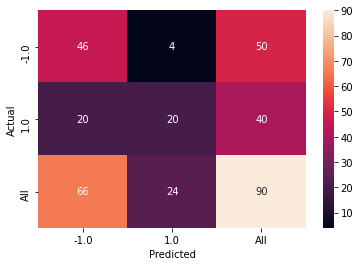

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


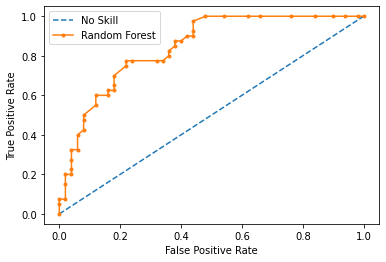

In [0]:
plot_roc_auc(model,X_test,y_test,"Random Forest")

Support Vector Classifier (Count Vectorizer)

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = X_df.sentimentAnnotation
X = X_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7444444444444445
Confusion matrix test set: 
 [[0.41111111 0.14444444]
 [0.11111111 0.33333333]]


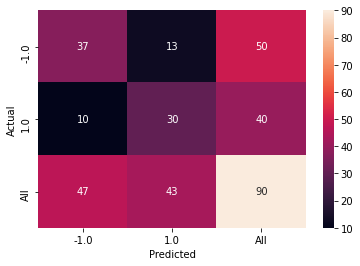

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.825


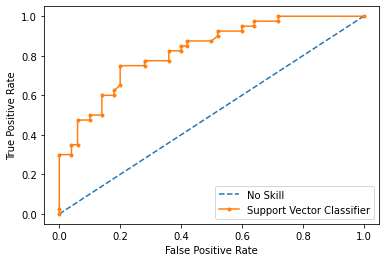

In [0]:
plot_roc_auc(clf,X_test,y_test,"Support Vector Classifier")

**Step 6: Creating a TfIdf Vectorizer**

In [0]:
# Import the required vectorizer package
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer and specify the arguments
vect = TfidfVectorizer(stop_words=my_stop_words).fit(df.Speech)

# Transform the vectorizer
X_sp = vect.transform(df.Speech)

# Transform to a data frame and specify the column names
final_df=pd.DataFrame(X_sp.toarray(), columns=vect.get_feature_names())
final_df['sentimentAnnotation']=df.sentimentAnnotation
print('Top 5 rows of the DataFrame: \n', final_df.head())

Top 5 rows of the DataFrame: 
    abajo  abbey  abierta  abri  ...  zombie  zombies  zonas  sentimentAnnotation
0    0.0    0.0      0.0   0.0  ...     0.0      0.0    0.0                 -1.0
1    0.0    0.0      0.0   0.0  ...     0.0      0.0    0.0                 -1.0
2    0.0    0.0      0.0   0.0  ...     0.0      0.0    0.0                 -1.0
3    0.0    0.0      0.0   0.0  ...     0.0      0.0    0.0                 -1.0
4    0.0    0.0      0.0   0.0  ...     0.0      0.0    0.0                  1.0

[5 rows x 1411 columns]


**Step 7: Creating different classification models and evaluating their accuracy**

Logistic Regression (Tfidf Vectorizer)

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = final_df.sentimentAnnotation
X = final_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on train set:  0.9472222222222222
Accuracy on test set:  0.7555555555555555
Accuracy score test set:  0.7555555555555555
Confusion matrix test set: 
 [[0.51111111 0.04444444]
 [0.2        0.24444444]]


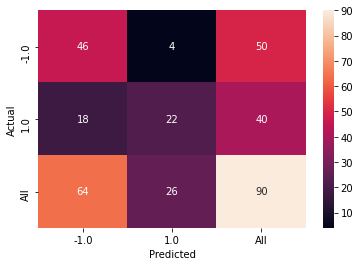

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.866


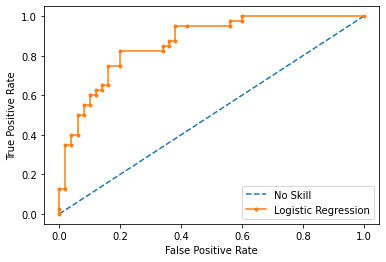

In [0]:
plot_roc_auc(log_reg,X_test,y_test,"Logistic Regression")

Decision Tree (Tfidf Vectorizer)

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0)

# Define the vector of targets and matrix of features
y = final_df.sentimentAnnotation
X = final_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))


Accuracy score test set:  0.7
Confusion matrix test set: 
 [[0.46666667 0.08888889]
 [0.21111111 0.23333333]]


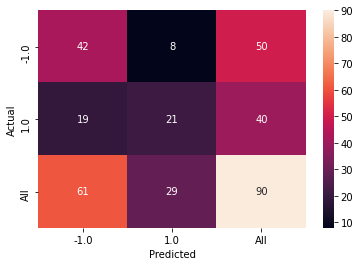

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.682


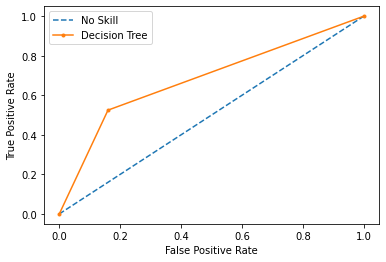

In [0]:
plot_roc_auc(clf,X_test,y_test,"Decision Tree")

Xgboost Classifier (Tfidf Vectorizer)

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix

# Define the vector of targets and matrix of features
y = final_df.sentimentAnnotation
X = final_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGB Classifier
xg_model = XGBClassifier()

#Train XGB Model
xg_model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = xg_model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: %f" % (rmse))

Accuracy score test set:  0.6222222222222222
Confusion matrix test set: 
 [[0.44444444 0.11111111]
 [0.26666667 0.17777778]]
RMSE: 1.229273


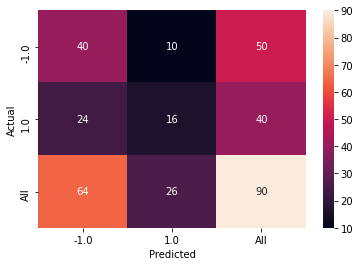

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.698


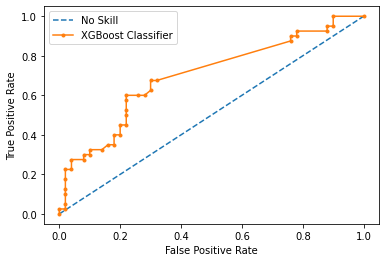

In [0]:
plot_roc_auc(xg_model,X_test,y_test,"XGBoost Classifier")

Random Forest (Tfidf Vectorizer)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Model
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Define the vector of targets and matrix of features
y = final_df.sentimentAnnotation
X = final_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit on training data
model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))




Accuracy score test set:  0.7444444444444445
Confusion matrix test set: 
 [[0.53333333 0.02222222]
 [0.23333333 0.21111111]]


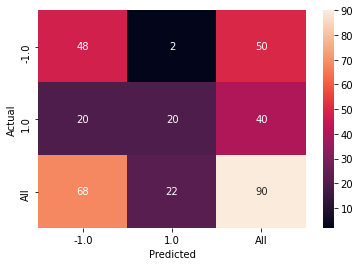

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.814


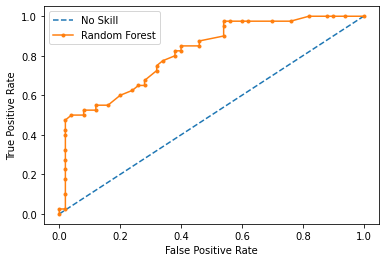

In [0]:
plot_roc_auc(model,X_test,y_test,"Random Forest")

Support Vector Classifier (Tfidf Vectorizer)

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Define the vector of targets and matrix of features
y = final_df.sentimentAnnotation
X = final_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7777777777777778
Confusion matrix test set: 
 [[0.46666667 0.08888889]
 [0.13333333 0.31111111]]


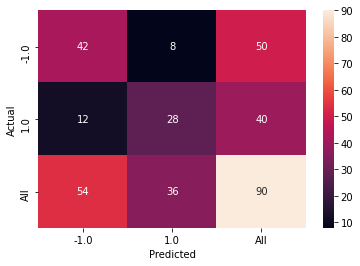

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.869


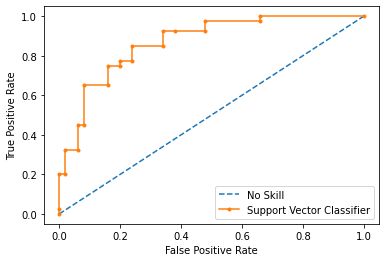

In [0]:
plot_roc_auc(clf,X_test,y_test,"Support Vector Classifier")

*Module 2: With Lemmatization*

**Step 1: Import Multilingual Lemmatizer library**

In [0]:
pip install spacy


In [0]:
pip install https://github.com/explosion/spacy-models/releases/download/es_core_news_md-2.2.5/es_core_news_md-2.2.5.tar.gz

In [0]:
import es_core_news_md
import spacy
nlp=es_core_news_md.load()

**Step 2: Lemmatization**

In [0]:
#Lemmatization on individual entries, stored in a list
l=[]
for t in df.Speech:
  s=''
  for i in nlp(t):
    s=s+i.lemma_+' '
  l.append(s)

In [0]:
#Replacing Speech column with Lemmatized entries
df['Speech']=l
df.head()

,Unnamed: 0,Speech,sentimentAnnotation
0,0,habia vestir resenas decian picar usar,-1.0
1,1,verdad si usar vez t arder asi usar arder ojo,-1.0
2,2,decir poder ser posible desear arder ir poder ...,-1.0
3,3,tambien tirar poquito pelar hacer contar quebr...,-1.0
4,4,igual lavar dejar tirar,1.0


**Step 3: Create a Count Vectorizer (Lemmatized)**

In [0]:
#importing required packages
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
       
#Create Vectorizer and remove stopwords
list_speech=df['Speech'].values.tolist()
vect=CountVectorizer()
vect.fit(df.Speech)
fin_speech=vect.transform(df.Speech)

Es_df = pd.DataFrame(fin_speech.toarray(), columns=vect.get_feature_names())
Es_df['sentimentAnnotation']=df.sentimentAnnotation

#Dataframe after removing stopwords and lemmatization
print(Es_df.head()) 

   abajar  abbey  abri  abrir  ...  zombies  zona  él  sentimentAnnotation
0       0      0     0      0  ...        0     0   0                 -1.0
1       0      0     0      0  ...        0     0   0                 -1.0
2       0      0     0      0  ...        0     0   0                 -1.0
3       0      0     0      0  ...        0     0   0                 -1.0
4       0      0     0      0  ...        0     0   0                  1.0

[5 rows x 1098 columns]


**Step 4: Creating different classification models and evaluating their accuracy**

Logistic Regression (Count Vectorizer)

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = Es_df.sentimentAnnotation
X = Es_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
#print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on train set:  0.9833333333333333
Accuracy on test set:  0.7777777777777778
Accuracy score test set:  0.7777777777777778


Decision Tree (Count Vectorizer)

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0)

# Define the vector of targets and matrix of features
y = Es_df.sentimentAnnotation
X = Es_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7
Confusion matrix test set: 
 [[0.4        0.15555556]
 [0.14444444 0.3       ]]


XGBoost Classifier (Count Vectorizer)

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix

# Define the vector of targets and matrix of features
y = Es_df.sentimentAnnotation
X = Es_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGB Classifier
xg_model = XGBClassifier()

#Train XGB Model
xg_model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = xg_model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: %f" % (rmse))

Accuracy score test set:  0.7555555555555555
Confusion matrix test set: 
 [[0.48888889 0.06666667]
 [0.17777778 0.26666667]]
RMSE: 0.988826


Random Forest (Count Vectorizer)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Model
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Define the vector of targets and matrix of features
y = Es_df.sentimentAnnotation
X = Es_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit on training data
model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.8
Confusion matrix test set: 
 [[0.5        0.05555556]
 [0.14444444 0.3       ]]


Support Vector Classifier (Count Vectorizer)

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = Es_df.sentimentAnnotation
X = Es_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7777777777777778
Confusion matrix test set: 
 [[0.46666667 0.08888889]
 [0.13333333 0.31111111]]


**Create Tfidf Vectorizer (Lemmatized)**

In [0]:
# Import the required vectorizer package
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer and specify the arguments
vect = TfidfVectorizer(stop_words=my_stop_words).fit(df.Speech)

# Transform the vectorizer
X_sp = vect.transform(df.Speech)

# Transform to a data frame and specify the column names
EsTf_df=pd.DataFrame(X_sp.toarray(), columns=vect.get_feature_names())
EsTf_df['sentimentAnnotation']=df.sentimentAnnotation
print('Top 5 rows of the DataFrame: \n', EsTf_df.head())

Top 5 rows of the DataFrame: 
    abajar  abbey  abri  abrir  ...  zombie  zombies  zona  sentimentAnnotation
0     0.0    0.0   0.0    0.0  ...     0.0      0.0   0.0                 -1.0
1     0.0    0.0   0.0    0.0  ...     0.0      0.0   0.0                 -1.0
2     0.0    0.0   0.0    0.0  ...     0.0      0.0   0.0                 -1.0
3     0.0    0.0   0.0    0.0  ...     0.0      0.0   0.0                 -1.0
4     0.0    0.0   0.0    0.0  ...     0.0      0.0   0.0                  1.0

[5 rows x 1092 columns]


**Creating different classification models and evaluating their accuracy**

Logistic Regression (Tfidf Vectorizer)

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = EsTf_df.sentimentAnnotation
X = EsTf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on train set:  0.9444444444444444
Accuracy on test set:  0.7666666666666667
Accuracy score test set:  0.7666666666666667
Confusion matrix test set: 
 [[0.5        0.05555556]
 [0.17777778 0.26666667]]


Decision Tree (Tfidf Vectorizer)

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0)

# Define the vector of targets and matrix of features
y = EsTf_df.sentimentAnnotation
X = EsTf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.6333333333333333
Confusion matrix test set: 
 [[0.4        0.15555556]
 [0.21111111 0.23333333]]


XGBoost Classifier (Tfidf Vectorizer)

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix

# Define the vector of targets and matrix of features
y = EsTf_df.sentimentAnnotation
X = EsTf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGB Classifier
xg_model = XGBClassifier()

#Train XGB Model
xg_model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = xg_model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: %f" % (rmse))

Accuracy score test set:  0.7222222222222222
Confusion matrix test set: 
 [[0.48888889 0.06666667]
 [0.21111111 0.23333333]]
RMSE: 1.054093


Random Forest (Tfidf Vectorizer)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Model
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Define the vector of targets and matrix of features
y = EsTf_df.sentimentAnnotation
X = EsTf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit on training data
model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7444444444444445
Confusion matrix test set: 
 [[0.5        0.05555556]
 [0.2        0.24444444]]


Support Vector Classifier (Tfidf Vectorizer)

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Define the vector of targets and matrix of features
y = EsTf_df.sentimentAnnotation
X = EsTf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.8444444444444444
Confusion matrix test set: 
 [[0.5        0.05555556]
 [0.1        0.34444444]]


**Step 8: Creating Word Clouds to visualise frequency**

In [0]:
tokenized = []

for item in df.Speech: 
  token = word_tokenize(item)
  for t in token:
    if t in my_stop_words:
      token.remove(t)
  tokenized.append(token)

print(tokenized[2])

['dije', 'puede', 'ser', 'posible', 'deseaba', 'arde', 'voy', 'poder', 'usar']


(-0.5, 399.5, 199.5, -0.5)

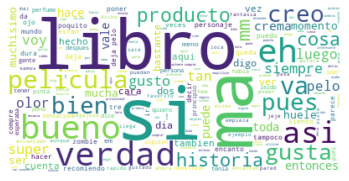

In [0]:
from wordcloud import WordCloud
comp_string=''
for item in tokenized:
  for v in item:
    comp_string = comp_string + ' ' + v

my_cloud = WordCloud(background_color='white').generate(comp_string)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

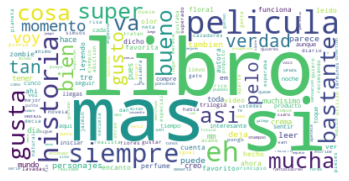

In [0]:
#Creating positive and negative sentiment concatenated strings

pos_string=''
neg_string=''
i=0
for item in df.Speech:
  if df.sentimentAnnotation[i] == 1.0:
    pos_string = pos_string + item
  elif df.sentimentAnnotation[i] == -1.0:
    neg_string = neg_string + item
  i=i+1

#Positive sentiment wordcloud
pos_cloud = WordCloud(background_color='white').generate(pos_string)

# Display the generated wordcloud image
plt.imshow(pos_cloud, interpolation='bilinear') 
plt.axis("off")



(-0.5, 399.5, 199.5, -0.5)

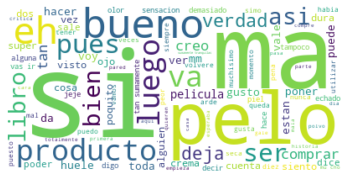

In [0]:
#Negative sentiment wordcloud
neg_cloud = WordCloud(background_color='white').generate(neg_string)

# Display the generated wordcloud image
plt.imshow(neg_cloud, interpolation='bilinear') 
plt.axis("off")

*Module 2: Applying Translation and Lemmatization*

**Step 1: Translate the data**

In [0]:
from textblob import TextBlob
translated_1 = []
for i in tr_df.Speech:
    word = TextBlob(i)
    a = word.translate(from_lang= 'es',to='en')
    translated_1.append(str(a))
tr_df['EngSpeech'] = translated_1

In [0]:
tr_df.head()

,Unnamed: 0,Unnamed: 0.1,Speech,sentimentAnnotation,EngSpeech
0,0,0,yo habia visto resenas que decian que picaba c...,-1.0,I had seen reviews that said it itchy when you...
1,1,1,y la verdad es que si la use una vez y t- y te...,-1.0,and the truth is that if I use it once and t- ...
2,2,2,y dije no: puede ser posible tanto la deseaba ...,-1.0,and I said no: it could be possible so much I ...
3,3,3,esta tambien tira un poquito de pelo pero haga...,-1.0,It also pulls a little hair but pretend that i...
4,4,4,pero igual con las lavadas se ha dejado de tir...,1.0,but the same with the washes it has stopped th...


In [0]:
tr_df.to_csv('/content/text_trans.csv',index=None)

**Step 2: Input the translated data and explore it**

In [0]:
data = pd.read_csv('/content/text_trans.csv')
tr_df = pd.DataFrame(data)
tr_df.head()

,Unnamed: 0,Unnamed: 0.1,Speech,sentimentAnnotation,EngSpeech
0,0,0,yo habia visto resenas que decian que picaba c...,-1.0,I had seen reviews that said it itchy when you...
1,1,1,y la verdad es que si la use una vez y t- y te...,-1.0,and the truth is that if I use it once and t- ...
2,2,2,y dije no: puede ser posible tanto la deseaba ...,-1.0,and I said no: it could be possible so much I ...
3,3,3,esta tambien tira un poquito de pelo pero haga...,-1.0,It also pulls a little hair but pretend that i...
4,4,4,pero igual con las lavadas se ha dejado de tir...,1.0,but the same with the washes it has stopped th...


**Step 3: Preprocessing Text**
- Remove any HTML Tags
- Remove all non-alphabetic characters
- Change all words to lowercase
- Remove stopwords
- Remove Spanish Speech column from Dataframe

In [0]:
#Removing Spanish Speech and retaining English Speech
fin_df=tr_df.drop(columns=['Speech'],axis=1)
fin_df.head()

,Unnamed: 0,Unnamed: 0.1,sentimentAnnotation,EngSpeech
0,0,0,-1.0,I had seen reviews that said it itchy when you...
1,1,1,-1.0,and the truth is that if I use it once and t- ...
2,2,2,-1.0,and I said no: it could be possible so much I ...
3,3,3,-1.0,It also pulls a little hair but pretend that i...
4,4,4,1.0,but the same with the washes it has stopped th...


In [0]:
#import english stopwords
from nltk.corpus import stopwords
eng_stop_words=list(stopwords.words('english'))

In [0]:
from bs4 import BeautifulSoup
import re
def preprocess_text(text):
    #remove html tags
    tags_rem = BeautifulSoup(text, "lxml").get_text()
    #remove non alphabet characters
    letters_only = re.sub("[^a-zA-Z]", " ", tags_rem)
    #make all words lower
    words = letters_only.lower().split()
    #fetch stop words list
    stop_word = set(stopwords.words("english"))
    #get list with stop words removed
    final = [w for w in words if not w in stop_word]
    return( " ".join( final))


fin_df['EngSpeech'] = fin_df['EngSpeech'].apply(lambda x: preprocess_text(x))

In [0]:
fin_df.head()

,Unnamed: 0,Unnamed: 0.1,sentimentAnnotation,EngSpeech
0,0,0,-1.0,seen reviews said itchy used
1,1,1,-1.0,truth use burns like use eye burns
2,2,2,-1.0,said could possible much wanted burns able use
3,3,3,-1.0,also pulls little hair pretend breaks hair fel...
4,4,4,1.0,washes stopped throwing


**Step 4: Create a Count Vectorizer with Lemmatization**

In [0]:
#importing required packages
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#Lemmatizer Function
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

#Create Vectorizer and remove stopwords
vect=CountVectorizer(tokenizer=LemmaTokenizer(), stop_words=eng_stop_words)
vect.fit(fin_df.EngSpeech)
fin_speech=vect.transform(fin_df.EngSpeech)

Eng_df = pd.DataFrame(fin_speech.toarray(), columns=vect.get_feature_names())
Eng_df['sentimentAnnotation']=df.sentimentAnnotation

#Dataframe after removing stopwords
print(Eng_df.head()) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


   abbey  able  absolutely  ...  youth  zombie  sentimentAnnotation
0      0     0           0  ...      0       0                 -1.0
1      0     0           0  ...      0       0                 -1.0
2      0     1           0  ...      0       0                 -1.0
3      0     0           0  ...      0       0                 -1.0
4      0     0           0  ...      0       0                  1.0

[5 rows x 1053 columns]


**Step 5: Creating different classification models and evaluating their accuracy**

Logistic Regression (Count Vectorizer)

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = Eng_df.sentimentAnnotation
X = Eng_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on train set:  0.9805555555555555
Accuracy on test set:  0.8111111111111111
Accuracy score test set:  0.8111111111111111
Confusion matrix test set: 
 [[0.48888889 0.06666667]
 [0.12222222 0.32222222]]


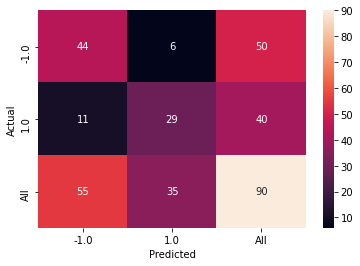

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.894


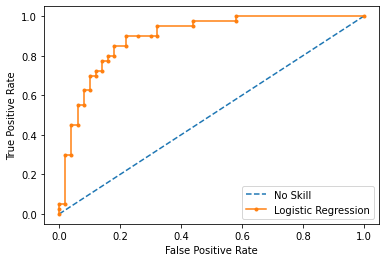

In [0]:
plot_roc_auc(log_reg,X_test,y_test,"Logistic Regression")

Decision Tree (Count Vectorizer)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
clf = DecisionTreeClassifier(random_state=0)

# Define the vector of targets and matrix of features
y = Eng_df.sentimentAnnotation
X = Eng_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7222222222222222
Confusion matrix test set: 
 [[0.44444444 0.11111111]
 [0.16666667 0.27777778]]


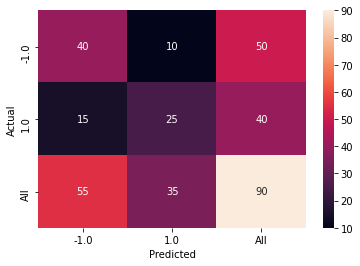

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.713


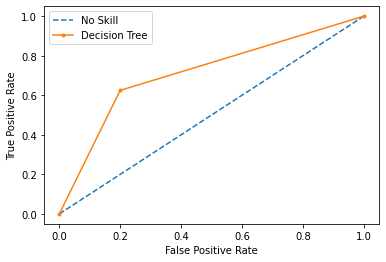

In [0]:
plot_roc_auc(clf,X_test,y_test,"Decision Tree")

XGBoost Classifier (Count Vectorizer)

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix

# Define the vector of targets and matrix of features
y = Eng_df.sentimentAnnotation
X = Eng_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGB Classifier
xg_model = XGBClassifier()

#Train XGB Model
xg_model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = xg_model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: %f" % (rmse))

Accuracy score test set:  0.7888888888888889
Confusion matrix test set: 
 [[0.51111111 0.04444444]
 [0.16666667 0.27777778]]
RMSE: 0.918937


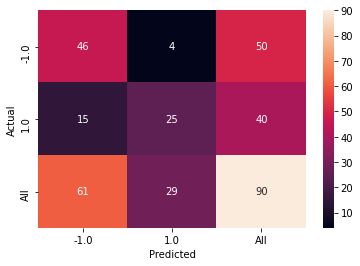

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.843


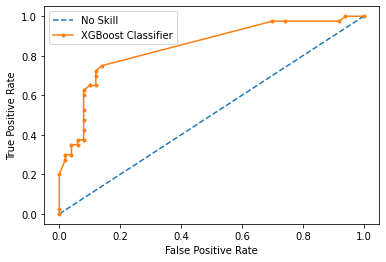

In [0]:
plot_roc_auc(xg_model,X_test,y_test,"XGBoost Classifier")

Random Forest (Count Vectorizer)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Model
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Define the vector of targets and matrix of features
y = Eng_df.sentimentAnnotation
X = Eng_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit on training data
model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7555555555555555
Confusion matrix test set: 
 [[0.51111111 0.04444444]
 [0.2        0.24444444]]


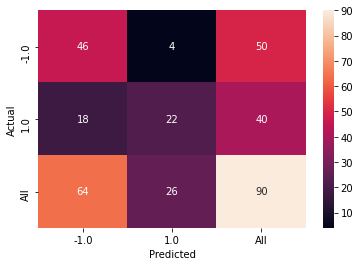

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.867


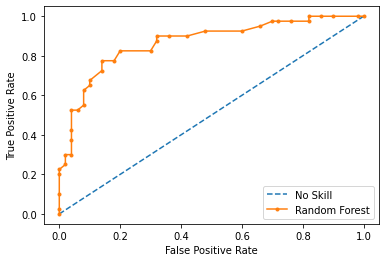

In [0]:
plot_roc_auc(model,X_test,y_test,"Random Forest")

Support Vector Classifier (Count Vectorizer)

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = Eng_df.sentimentAnnotation
X = Eng_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.8333333333333334
Confusion matrix test set: 
 [[0.48888889 0.06666667]
 [0.1        0.34444444]]


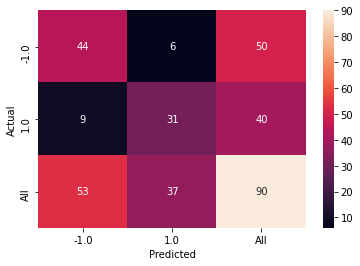

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.847


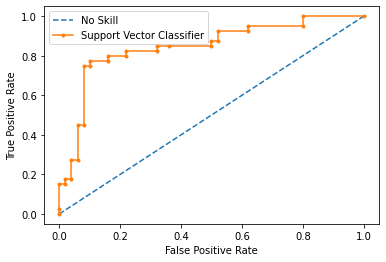

In [0]:
plot_roc_auc(clf,X_test,y_test,"Support Vector Classifier")

**Step 6: Create a TfIdf Vectorizer with Lemmatization**

In [0]:
# Import the required vectorizer package
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#Lemmatizer Function
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

# Define the vectorizer and specify the arguments
vect = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words=eng_stop_words).fit(fin_df.EngSpeech)

# Transform the vectorizer
X_sp = vect.transform(fin_df.EngSpeech)

# Transform to a data frame and specify the column names
Engtf_df=pd.DataFrame(X_sp.toarray(), columns=vect.get_feature_names())
Engtf_df['sentimentAnnotation']=fin_df.sentimentAnnotation
print('Top 5 rows of the DataFrame: \n', Engtf_df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Top 5 rows of the DataFrame: 
 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


   abbey     able  absolutely  ...  youth  zombie  sentimentAnnotation
0    0.0  0.00000         0.0  ...    0.0     0.0                 -1.0
1    0.0  0.00000         0.0  ...    0.0     0.0                 -1.0
2    0.0  0.38324         0.0  ...    0.0     0.0                 -1.0
3    0.0  0.00000         0.0  ...    0.0     0.0                 -1.0
4    0.0  0.00000         0.0  ...    0.0     0.0                  1.0

[5 rows x 1053 columns]


**Step 7: Creating different classification models and evaluating their accuracy**

Logistic Regression (TfIdf Vectorizer)

In [0]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the vector of targets and matrix of features
y = Engtf_df.sentimentAnnotation
X = Engtf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.9388888888888889
Accuracy on test set:  0.8222222222222222


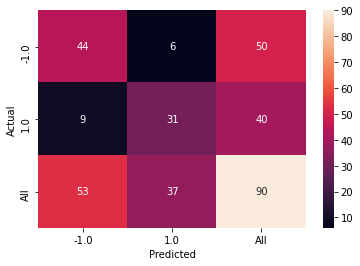

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.917


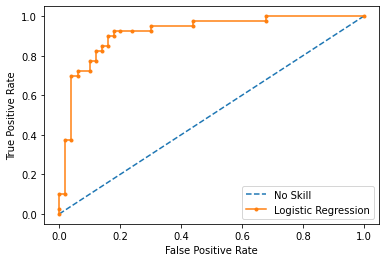

In [0]:
plot_roc_auc(log_reg,X_test,y_test,"Logistic Regression")

Decision Tree (TfIdf Vectorizer)

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0)

# Define the vector of targets and matrix of features
y = Engtf_df.sentimentAnnotation
X = Engtf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7333333333333333
Confusion matrix test set: 
 [[0.44444444 0.11111111]
 [0.15555556 0.28888889]]


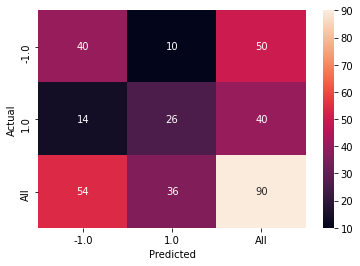

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.725


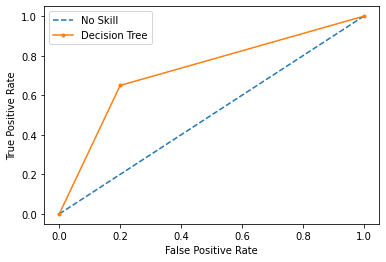

In [0]:
plot_roc_auc(clf,X_test,y_test,"Decision Tree")

XGBoost Classifier (TfIdf Vectorizer)

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix

# Define the vector of targets and matrix of features
y = Engtf_df.sentimentAnnotation
X = Engtf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGB Classifier
xg_model = XGBClassifier()

#Train XGB Model
xg_model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = xg_model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE: %f" % (rmse))

Accuracy score test set:  0.7666666666666667
Confusion matrix test set: 
 [[0.48888889 0.06666667]
 [0.16666667 0.27777778]]
RMSE: 0.966092


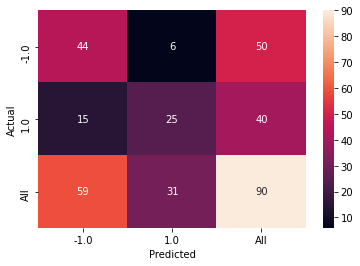

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.820


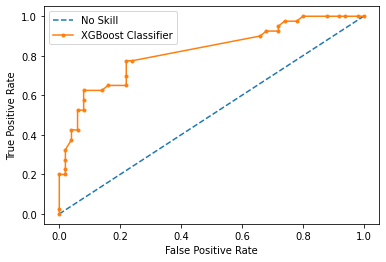

In [0]:
plot_roc_auc(xg_model,X_test,y_test,"XGBoost Classifier")

Random Forest (TfIdf Vectorizer)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Create Model
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Define the vector of targets and matrix of features
y = Engtf_df.sentimentAnnotation
X = Engtf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit on training data
model.fit(X_train,y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7777777777777778
Confusion matrix test set: 
 [[0.52222222 0.03333333]
 [0.18888889 0.25555556]]


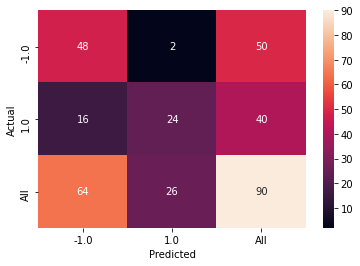

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.891


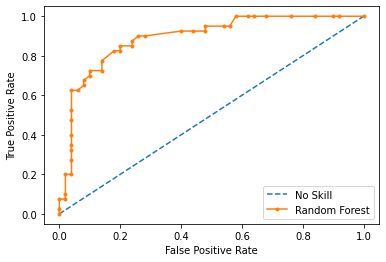

In [0]:
plot_roc_auc(model,X_test,y_test,"Random Forest")

Support Vector Classifier (TfIdf Vectorizer)

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Define the vector of targets and matrix of features
y = Engtf_df.sentimentAnnotation
X = Engtf_df.drop('sentimentAnnotation', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.8111111111111111
Confusion matrix test set: 
 [[0.52222222 0.03333333]
 [0.15555556 0.28888889]]


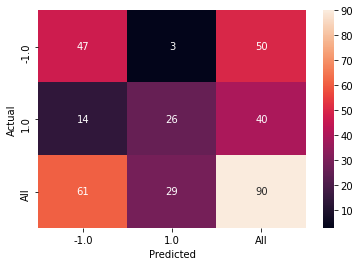

In [0]:
confusion_matrix = pd.crosstab(y_test,y_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.918


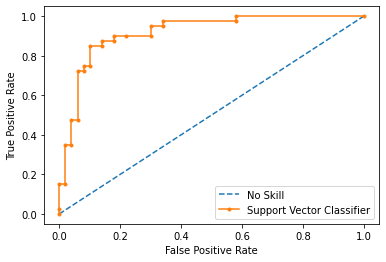

In [0]:
plot_roc_auc(clf,X_test,y_test,"Support Vector Classifier")